In [ ]:
klearn.neighbors import NearestCentroid
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

import time
import warnings
warnings.filterwarnings("ignore")# Importing the Neccessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc)

from s

In [ ]:
# Loading the Dataframe

data = pd.read_excel('/content/train_data.xlsx')
data.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [ ]:
data.tail()

customer_id transaction_date sub_grade        term home_ownership  \
113700     75790158       2016-03-01        D1   36 months           RENT   
113701     74641781       2016-03-01        D2   36 months            OWN   
113702     73712850       2016-03-01        D1   36 months           RENT   
113703     72713907       2016-03-01        C5   36 months       MORTGAGE   
113704     75820776       2016-03-01        E1   60 months       MORTGAGE   

        cibil_score  total_no_of_acc  annual_inc  int_rate  \
113700          670                0     53000.0     16.29   
113701          660                0     40000.0     17.27   
113702          690                0     25000.0     16.29   
113703          680                0     80000.0     15.31   
113704          665                0     48000.0     19.99   

                   purpose  loan_amnt application_type  installment  \
113700         credit_card      10000       Individual       353.01   
113701  debt_consolidation       7025       Individual       251.41   
113702         credit_card      10000       Individual       353.01   
113703  debt_consolidation      12625       Individual       439.57   
113704  debt_consolidation      12000       Individual       317.86   

       verification_status  account_bal  emp_length  loan_status  
113700     Source Verified        14609          11            0  
113701     Source Verified        10250           2            1  
113702        Not Verified         6395           3            0  
113703            Verified         3882           7            0  
113704     Source Verified        11096           1            0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [ ]:
data.shape

(113705, 17)

In [ ]:
data.duplicated().sum()

0

Observation:

It appears that our data does not have any null values

Neither are there any duplicated values in our data sets

In [ ]:
data.describe()

customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%           0.000000  6.000000e+04      14.990000   13300.000000   
75%           0.000000  8.500000e+04      17.860000   20225.000000   
max          10.000000  8.900060e+06      28.990000   40000.000000   
std           0.647328  6.050616e+04       3.234215    9091.279851   

         installment    account_bal     emp_length    loan_status  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean      454.241150   15820.487094       5.959782       0.738895  
min        33.240000       0.000000       0.000000       0.000000  
25%       265.740000    5656.000000       2.000000       0.000000  
50%       388.290000   10841.000000       6.000000       1.000000  
75%       599.530000   19682.000000      11.000000       1.000000  
max      1460.430000  875598.000000      11.000000       1.000000  
std       268.251678   20447.614824       4.229570       0.439239

In [ ]:
# Identify Numerical and Categorical Columns
def identify_columns(data):
    numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    date_cols = data.select_dtypes(include=['datetime']).columns.tolist()
    print("Numerical Columns:", numerical_cols)
    print("Categorical Columns:", categorical_cols)
    print("Date Columns:", date_cols)
    return numerical_cols, categorical_cols, date_cols

numerical_cols, categorical_cols, date_cols = identify_columns(data)

Numerical Columns: ['customer_id', 'cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length', 'loan_status']
Categorical Columns: ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
Date Columns: ['transaction_date']


In [ ]:
# Checking for Errors in Categorical Variables:

for variable in categorical_cols:
    print(data[variable].value_counts())
    print("~"*50)

sub_grade
C2    12549
C3    12090
C4    11553
C1    10521
C5     9721
D1     8399
D2     6566
D3     5818
D4     5483
D5     4588
E1     4148
E2     3701
B5     3463
E3     3122
E4     2489
E5     2025
F1     1546
B4     1343
F2     1093
F3      961
F4      710
F5      564
G1      418
G2      311
G3      217
G5      156
G4      150
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
term
36 months    71625
60 months    42080
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
home_ownership
MORTGAGE    53462
RENT        47832
OWN         12411
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
purpose
debt_consolidation    71770
credit_card           18830
other                  7351
home_improvement       6865
major_purchase         2060
small_business         1759
medical                1485
moving                 1074
vacation                887
car                     881
house                   642
renewab

<Figure size 2000x1000 with 0 Axes>

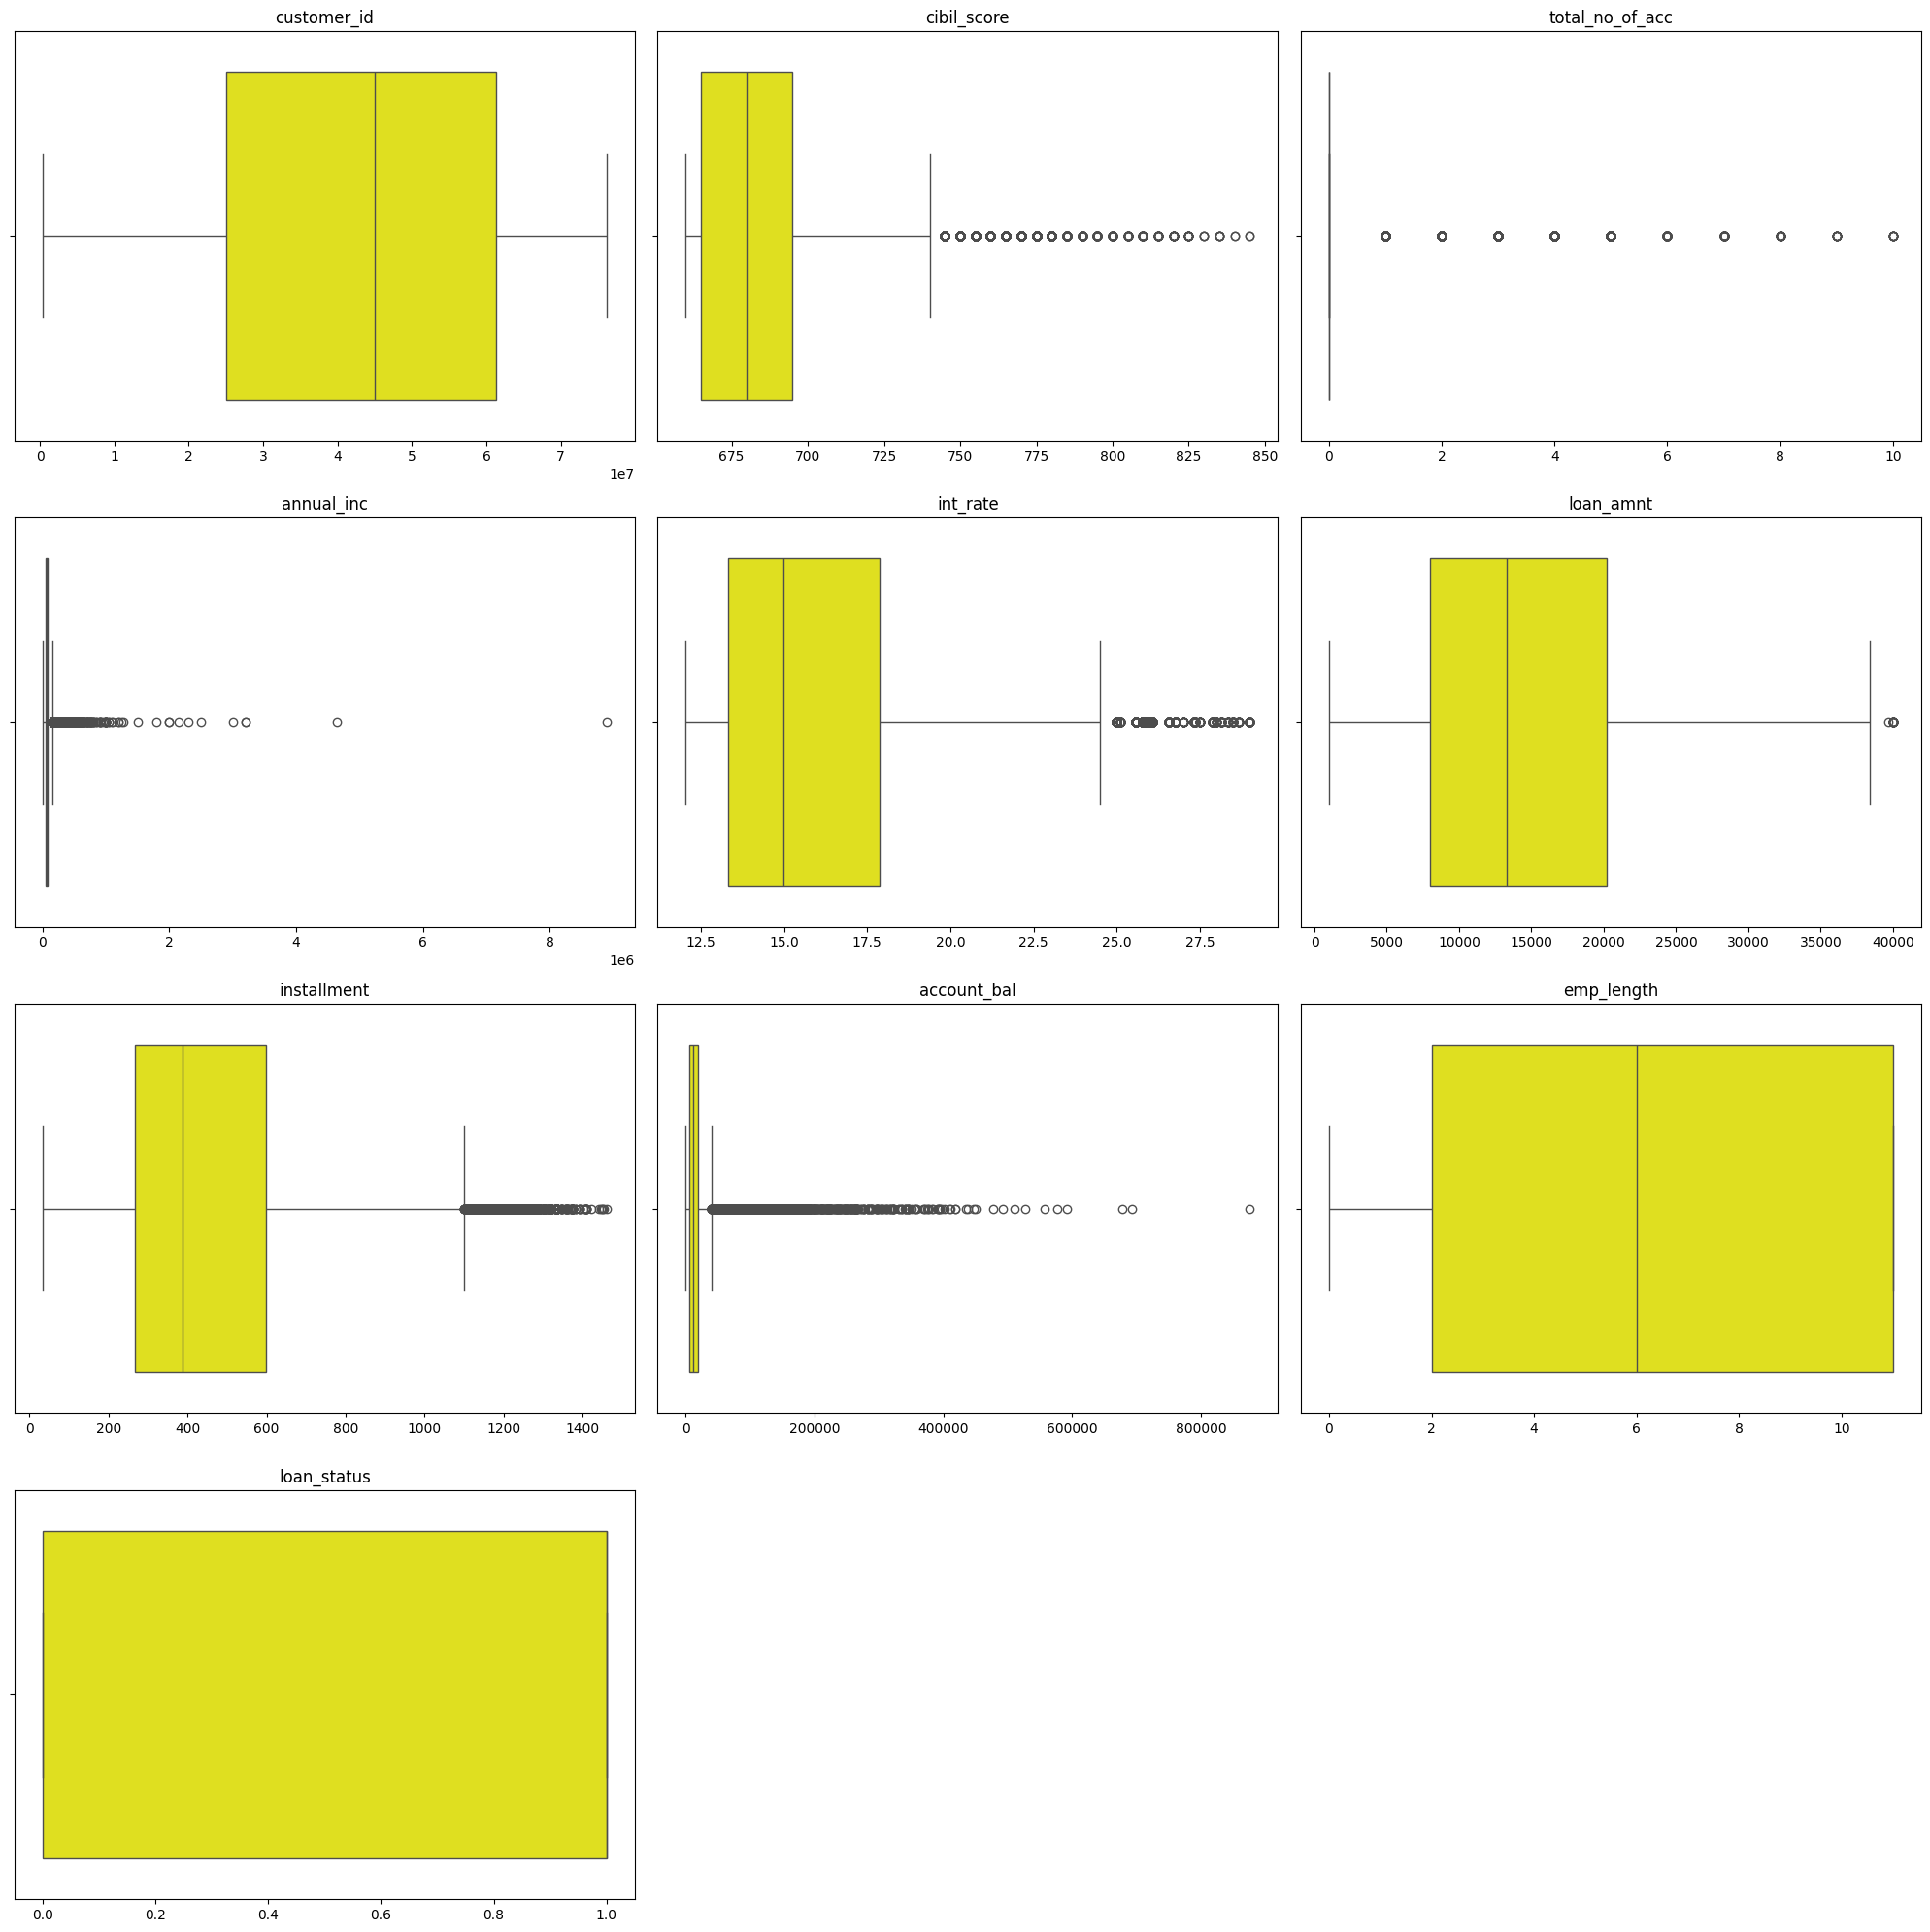

In [ ]:
# Checking for Ouliers

plt.figure(figsize=(20, 10))
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

# Adjust the figure size to accommodate the subplots better
plt.figure(figsize=(20, 5 * num_rows))

ind = 1
for variable in numerical_cols:
    plt.subplot(num_rows, 3, ind)  # Use num_rows and 3 for subplot layout
    sns.boxplot(x=data[variable], color="yellow")
    plt.title(variable)
    ind += 1
    plt.xlabel('')

plt.tight_layout()
plt.show()

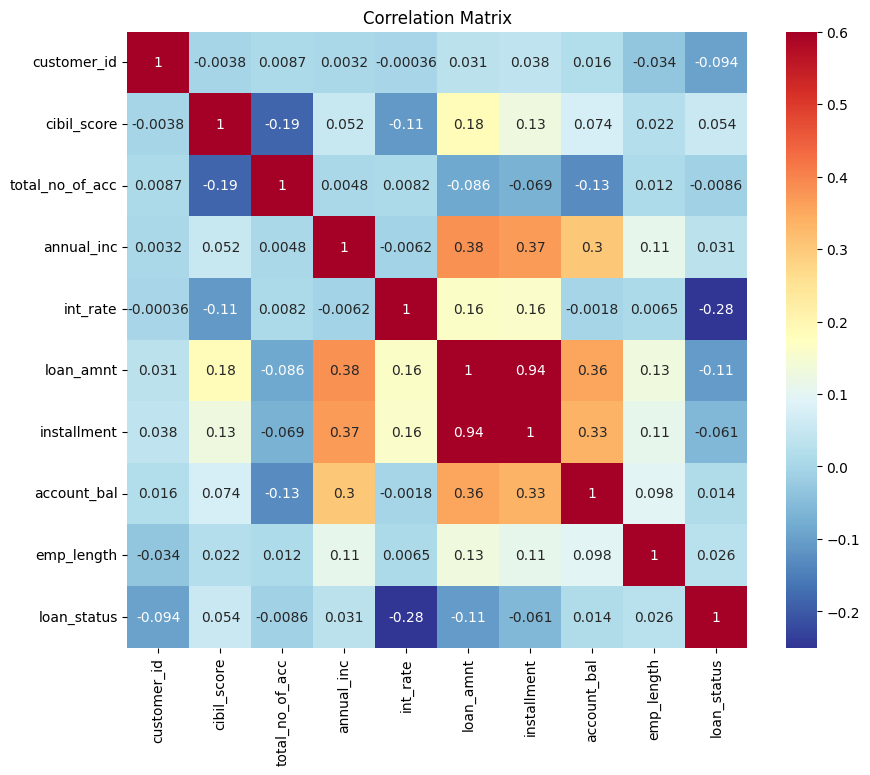

In [ ]:
# Correlation Heatmap (Numerical Columns)

plt.figure(figsize=(10, 8))
sns.heatmap(data[['customer_id', 'cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length', 'loan_status']].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

Inference :

Default and Interest rate are positively correlated (0.13).

Default and Age are negatively correlated (-0.17).

"Credit Score" is negatively correlated with Loan default


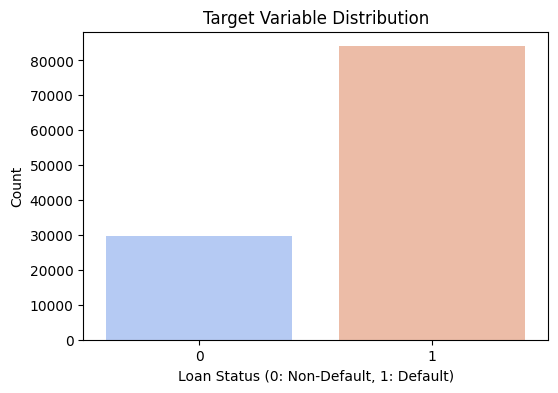

In [ ]:
# Target Variable Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data, palette='coolwarm') # Changed df to data
plt.title("Target Variable Distribution")
plt.xlabel("Loan Status (0: Non-Default, 1: Default)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Plots the distribution of a variable colored by value of the target
def kde_default(var_name, df):

    # Calculate the correlation coefficient between the new variable and the target
    corr = data['Default'].corr(data[var_name])

    # Calculate medians for repaid vs not repaid
    avg_repaid = data.loc[data['Default'] == 0, var_name].median()
    avg_not_repaid = data.loc[data['Default'] == 1, var_name].median()

    plt.figure(figsize=(12, 6))

    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(data.loc[df['Default'] == 0, var_name], label='Default == 0')
    sns.kdeplot(data.loc[df['Default'] == 1, var_name], label='Default == 1')

    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()

    # Print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))

    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid = %0.4f' % avg_repaid)

In [ ]:
# Numerical Features Analysis
numerical_cols = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']

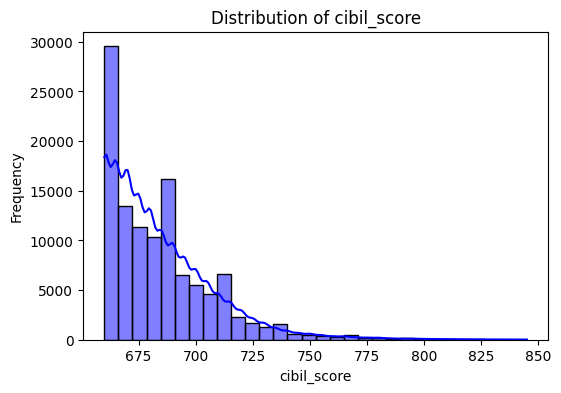

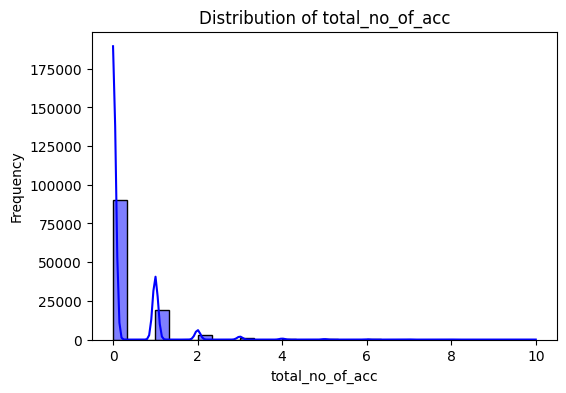

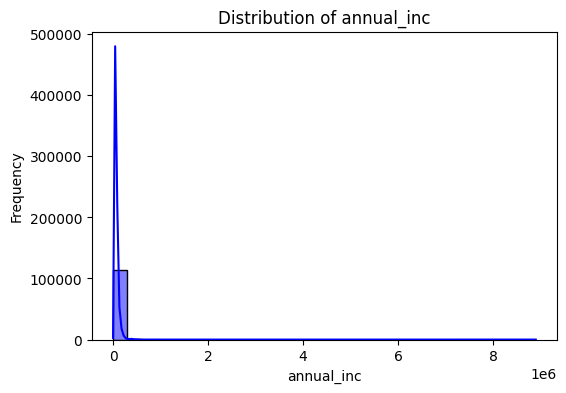

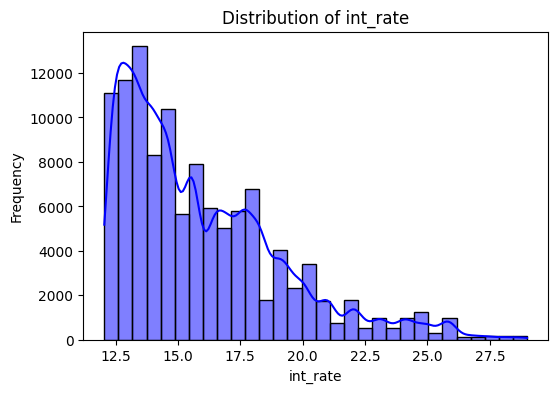

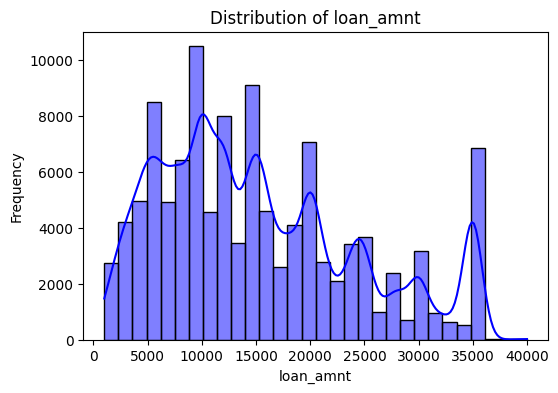

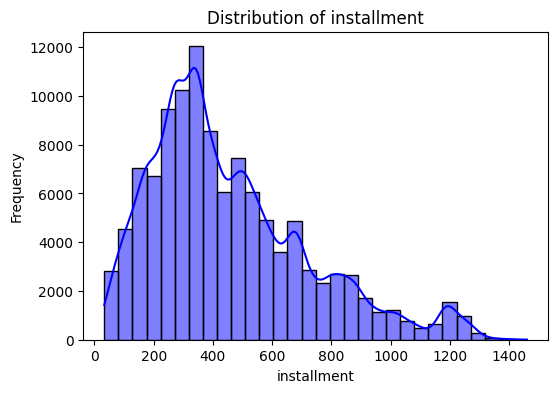

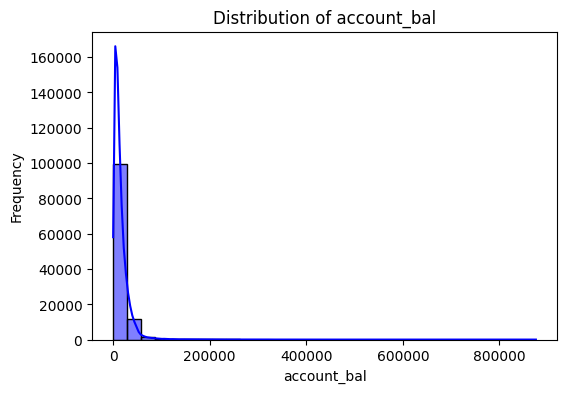

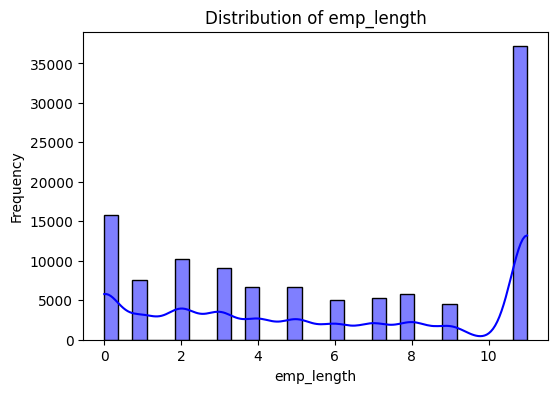

In [ ]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue') # Changed df to data
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Categorical Features Analysis
categorical_cols = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']

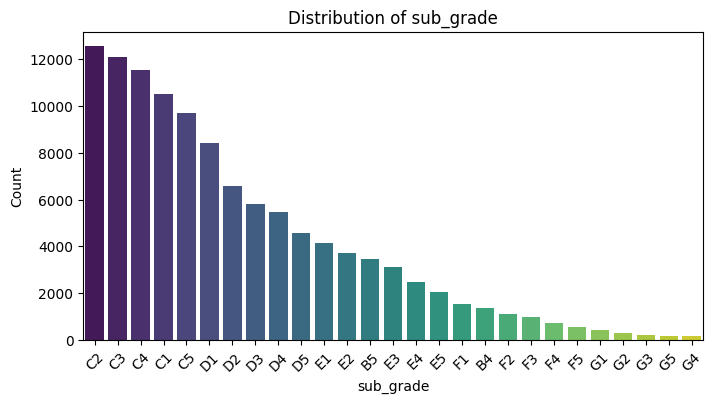

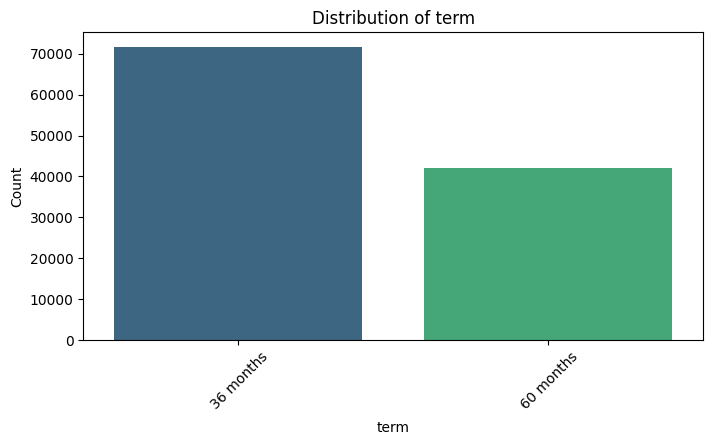

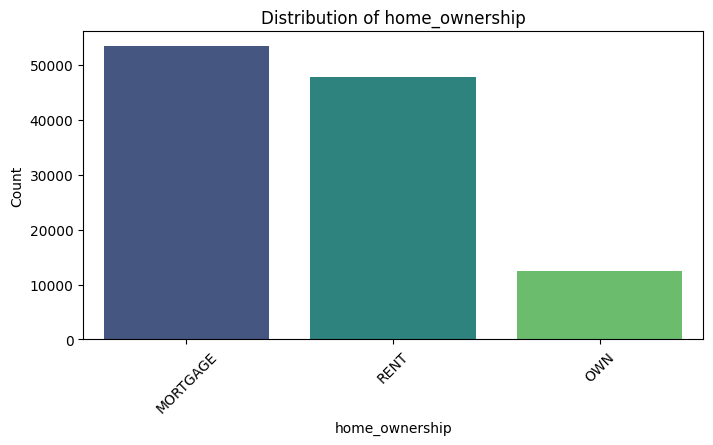

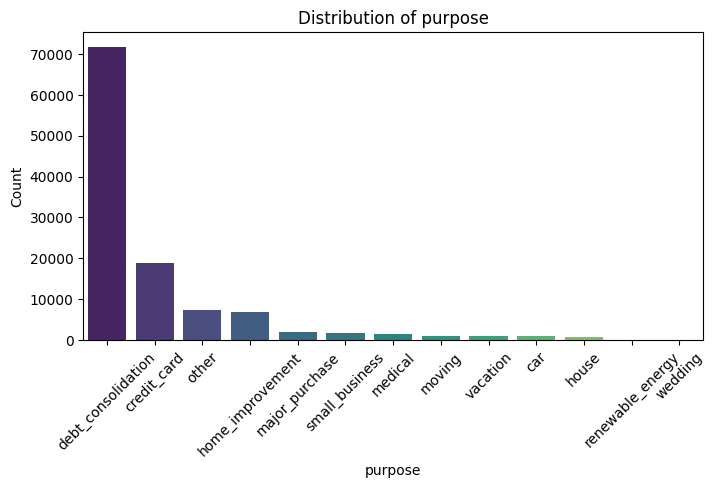

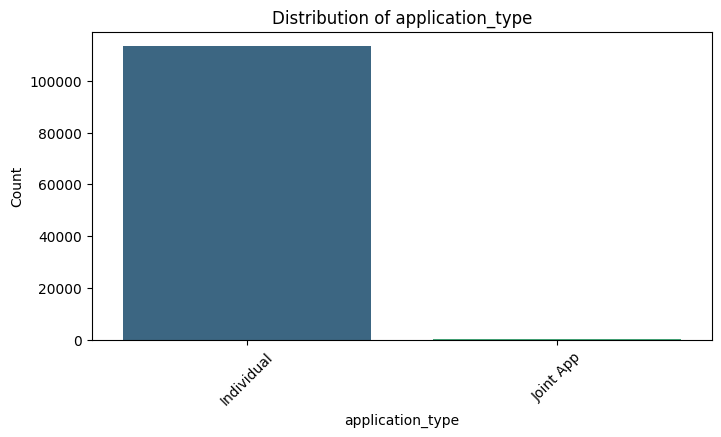

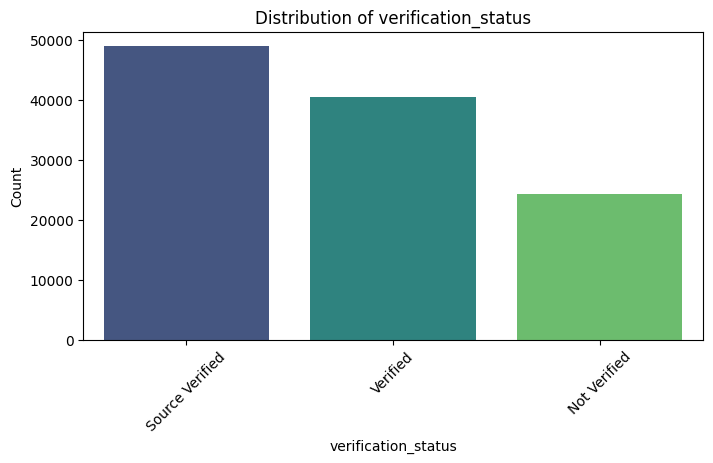

In [ ]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    # Changed df to data in the following line:
    sns.countplot(x=col, data=data, palette='viridis', order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

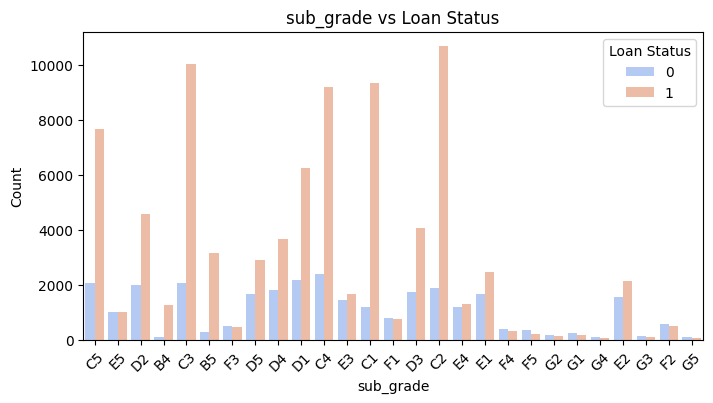

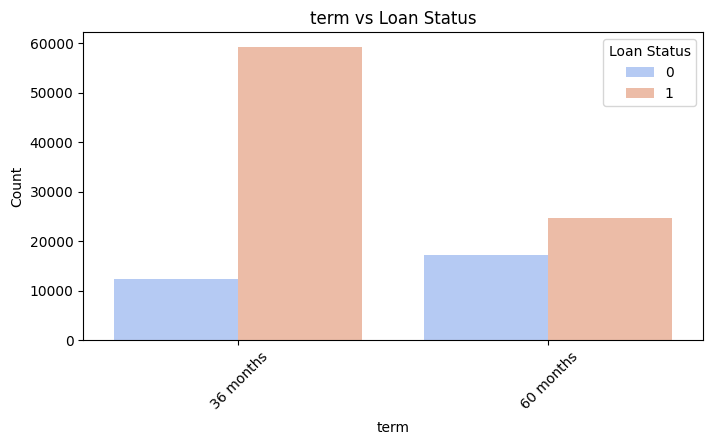

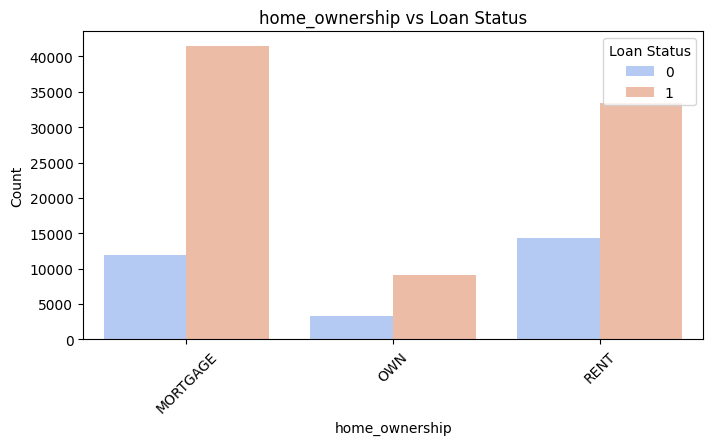

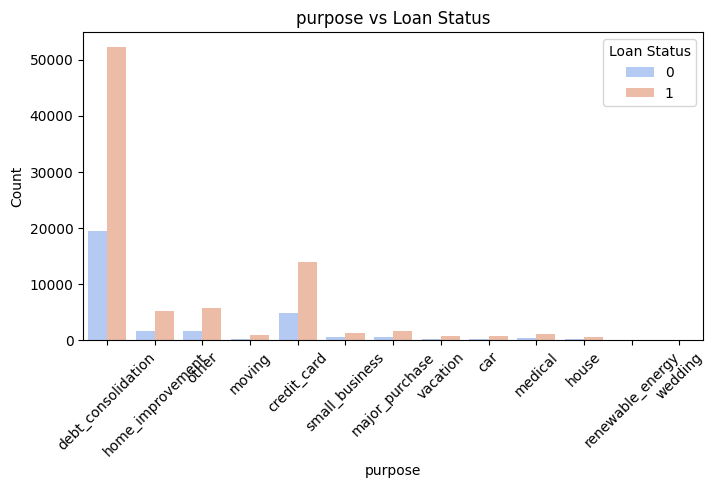

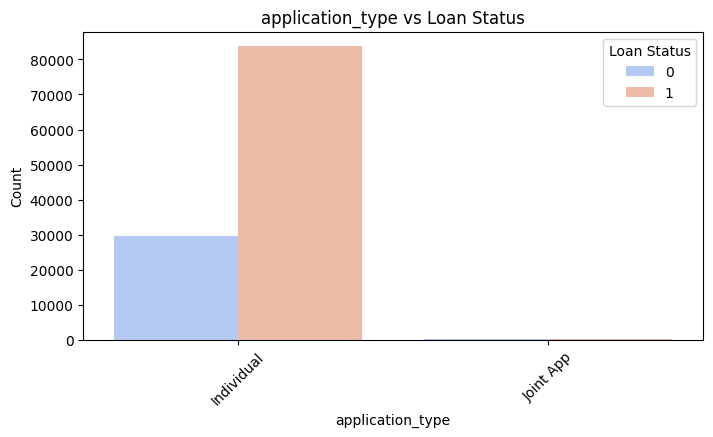

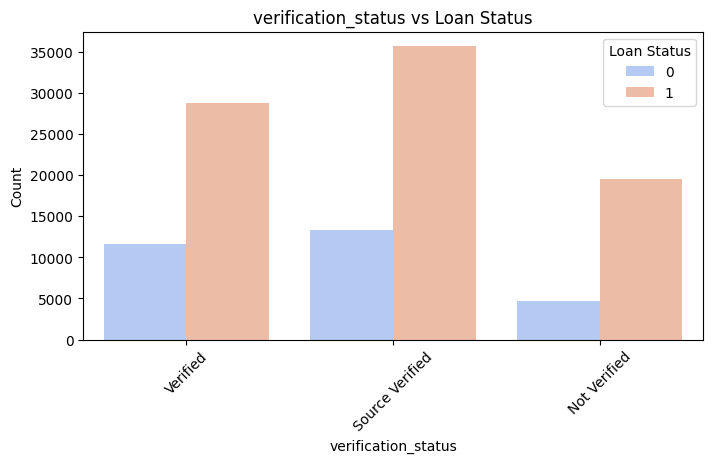

In [ ]:
# Analyze relationship with target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    # Replace 'df' with 'data' in the following line:
    sns.countplot(x=col, hue='loan_status', data=data, palette='coolwarm')
    plt.title(f"{col} vs Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Loan Status", loc='upper right')
    plt.show()

In [ ]:
# Date-based Analysis
data['year'] = data['transaction_date'].dt.year
data['month'] = data['transaction_date'].dt.month